In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
# import datetime
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from array import array
from numpy import array
import random

In [2]:
df = pd.read_csv('datafile1.csv')
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/2022,3.13,NaN,0.79,0.0,0.0,53.0,56,50,60,60,10.1,15.0
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/2022,5.82,NaN,0.04,0.0,0.0,48.0,59,37,300,300,18.1,30.0
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/2022,9.84,NaN,0.00,0.0,0.0,29.5,37,22,350,360,18.1,29.1
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/2022,6.04,NaN,0.00,0.0,0.0,26.5,34,19,300,290,14.1,23.0
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/2022,5.59,NaN,0.23,0.0,0.0,39.0,47,31,220,240,15.0,23.0


In [3]:
df['newDate'] = df['DATE'].apply(lambda x: datetime.strptime(x[:10], "%m/%d/%Y").strftime("%m/%d/%Y"))

In [4]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,newDate
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/2022,3.13,NaN,0.79,0.0,0.0,53.0,56,50,60,60,10.1,15.0,01/01/2022
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/2022,5.82,NaN,0.04,0.0,0.0,48.0,59,37,300,300,18.1,30.0,01/02/2022
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/2022,9.84,NaN,0.00,0.0,0.0,29.5,37,22,350,360,18.1,29.1,01/03/2022
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/2022,6.04,NaN,0.00,0.0,0.0,26.5,34,19,300,290,14.1,23.0,01/04/2022
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/2022,5.59,NaN,0.23,0.0,0.0,39.0,47,31,220,240,15.0,23.0,01/05/2022


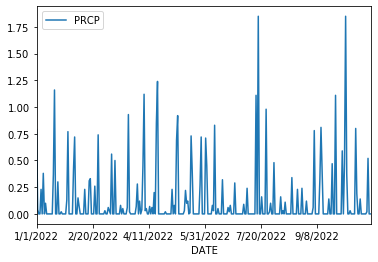

In [5]:
%matplotlib inline
df.plot(x='DATE',y='PRCP')

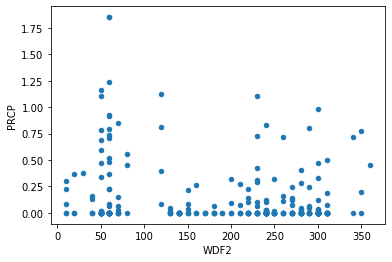

In [6]:
df.plot.scatter(x='WDF2',y='PRCP')

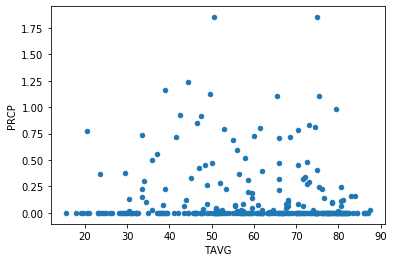

In [7]:
df.plot.scatter(x='TAVG',y='PRCP')

In [8]:
len(df.index)

300

In [9]:
#create binary precipitation variable
df.loc[df['PRCP'] <= 0, 'RAIN'] = 0
df.loc[df['PRCP'] > 0, 'RAIN'] = 1

In [10]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,newDate,RAIN
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/2022,3.13,NaN,0.79,0.0,0.0,53.0,56,50,60,60,10.1,15.0,01/01/2022,1.0
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/2022,5.82,NaN,0.04,0.0,0.0,48.0,59,37,300,300,18.1,30.0,01/02/2022,1.0
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/2022,9.84,NaN,0.00,0.0,0.0,29.5,37,22,350,360,18.1,29.1,01/03/2022,0.0
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/2022,6.04,NaN,0.00,0.0,0.0,26.5,34,19,300,290,14.1,23.0,01/04/2022,0.0
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/2022,5.59,NaN,0.23,0.0,0.0,39.0,47,31,220,240,15.0,23.0,01/05/2022,1.0


In [11]:
df['month'] = pd.to_datetime(df['newDate']).dt.month

In [12]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,newDate,RAIN,month
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/2022,3.13,NaN,0.79,0.0,0.0,53.0,56,50,60,60,10.1,15.0,01/01/2022,1.0,1
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/2022,5.82,NaN,0.04,0.0,0.0,48.0,59,37,300,300,18.1,30.0,01/02/2022,1.0,1
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/2022,9.84,NaN,0.00,0.0,0.0,29.5,37,22,350,360,18.1,29.1,01/03/2022,0.0,1
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/2022,6.04,NaN,0.00,0.0,0.0,26.5,34,19,300,290,14.1,23.0,01/04/2022,0.0,1
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/2022,5.59,NaN,0.23,0.0,0.0,39.0,47,31,220,240,15.0,23.0,01/05/2022,1.0,1


In [13]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
df['season']=df['month'].map(month_to_season)


In [14]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,newDate,RAIN,month,season
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/2022,3.13,NaN,0.79,0.0,0.0,53.0,56,50,60,60,10.1,15.0,01/01/2022,1.0,1,1
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/2022,5.82,NaN,0.04,0.0,0.0,48.0,59,37,300,300,18.1,30.0,01/02/2022,1.0,1,1
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/2022,9.84,NaN,0.00,0.0,0.0,29.5,37,22,350,360,18.1,29.1,01/03/2022,0.0,1,1
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/2022,6.04,NaN,0.00,0.0,0.0,26.5,34,19,300,290,14.1,23.0,01/04/2022,0.0,1,1
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/2022,5.59,NaN,0.23,0.0,0.0,39.0,47,31,220,240,15.0,23.0,01/05/2022,1.0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD44BB7DC8>,
      dtype=object)

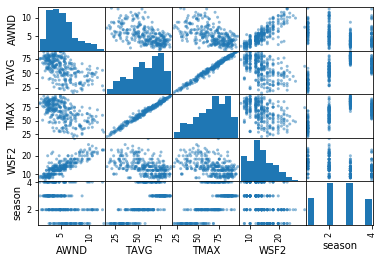

In [15]:
pd.plotting.scatter_matrix(df[['AWND', 'TAVG', 'TMAX', 'WSF2', 'season']])

In the line below, you should change the X matrix in order to set up multiple models to determine which is the most parsimonious. 

In [16]:
def regression_results(y_true, y_pred):

# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      203
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -135.06
Date:                Thu, 01 Dec 2022   Deviance:                       270.11
Time:                        23:12:33   Pearson chi2:                     208.
No. Iterations:                    15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AWND          -0.6715      0.322     -2.087      0.0

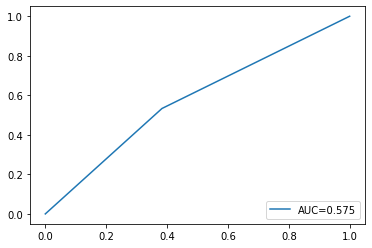

NameError: name 'anova' is not defined

In [43]:
X = df[['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'season']]
y = df['RAIN']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary(xname=['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'season']))

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 

#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_1)
auc = metrics.roc_auc_score(y_test, prediction_1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()


anova(GLMFIT1, test = "Chisq")

In [49]:
Predict_Data = pd.read_csv('datafile2.csv')
Predict_Data.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00094728,"NY CITY CENTRAL PARK, NY US",1/1/2022,3.13,NaN,0.79,0.0,0.0,53.0,56,50,60.0,60.0,10.1,15.0,1.0,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",1/2/2022,5.82,NaN,0.04,0.0,0.0,48.0,59,37,300.0,300.0,18.1,30.0,1.0,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",1/3/2022,9.84,NaN,0.00,0.0,0.0,29.5,37,22,350.0,360.0,18.1,29.1,NaN,NaN,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",1/4/2022,6.04,NaN,0.00,0.0,0.0,26.5,34,19,300.0,290.0,14.1,23.0,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",1/5/2022,5.59,NaN,0.23,0.0,0.0,39.0,47,31,220.0,240.0,15.0,23.0,1.0,NaN,NaN,NaN


In [50]:
Predict_Data['newDate'] = Predict_Data['DATE'].apply(lambda x: datetime.strptime(x[:10], "%m/%d/%Y").strftime("%m/%d/%Y"))

In [51]:
Predict_Data16th=Predict_Data[(Predict_Data['newDate'] =="11/16/2022")]

In [53]:
Predict_Data16th['month'] = pd.to_datetime(Predict_Data16th['newDate']).dt.month

C:\Users\Sumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
Predict_Data16th['season']=Predict_Data16th['month'].map(month_to_season)

C:\Users\Sumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
Predict_Data16th = Predict_Data16th[['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'season']]

In [56]:
Predict_Data16th

,AWND,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,season
319,8.05,44.5,50,39,60.0,90.0,16.1,4


In [57]:
scaler = StandardScaler()
Predict_Data16thScaled = scaler.fit_transform(Predict_Data16th)


In [61]:
print(Predict_Data16thScaled)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [59]:
pred_1 = GLMFIT1.predict(Predict_Data16thScaled)

In [63]:
pred_1

array([0.5])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      209
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -145.56
Date:                Thu, 01 Dec 2022   Deviance:                       291.12
Time:                        22:50:11   Pearson chi2:                     210.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0054      0.138     -0.039      0.9

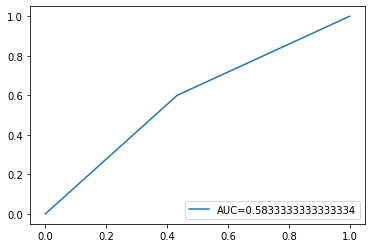

In [17]:
X = df[['season']]
y = df['RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary())

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_1)
auc = metrics.roc_auc_score(y_test, prediction_1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -144.14
Date:                Tue, 08 Nov 2022   Deviance:                       288.27
Time:                        20:53:20   Pearson chi2:                     210.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1817      0.150      1.211      0.2

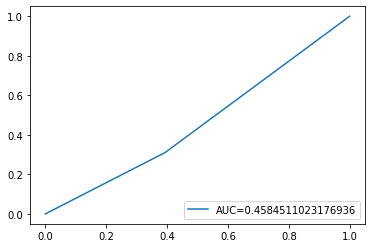

In [52]:
X = df[['AWND', 'season']]
y = df['RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary())

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_1)
auc = metrics.roc_auc_score(y_test, prediction_1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      206
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -143.66
Date:                Thu, 01 Dec 2022   Deviance:                       287.32
Time:                        22:50:13   Pearson chi2:                     210.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0770      0.168      0.458      0.6

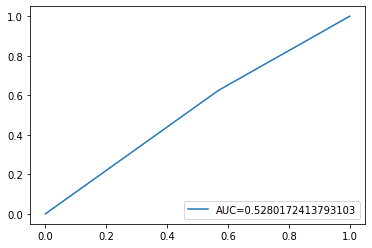

In [18]:
X = df[['AWND', 'TAVG', 'TMAX', 'season']]
y = df['RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary())

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_1)
auc = metrics.roc_auc_score(y_test, prediction_1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      206
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Nov 2022   Deviance:                          nan
Time:                        20:53:50   Pearson chi2:                 4.19e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.359e+14   5.56e+06  -2.45e+07      0.0

C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Sumit\Anaconda3\lib\site-packages\

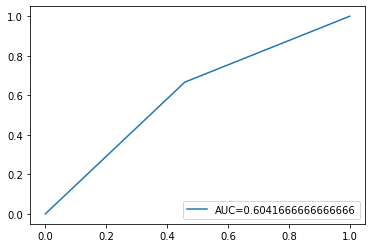

In [54]:
X = df[['AWND', 'TAVG', 'TMAX', 'TMIN', 'season']]
y = df['RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary())

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_1)
auc = metrics.roc_auc_score(y_test, prediction_1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
X = df[['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'season']]
y = df['RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary())

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 
## Confusion Matrix : 
##  [[49  5]
##  [ 1 88]]

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      205
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 01 Dec 2022   Deviance:                          nan
Time:                        22:50:17   Pearson chi2:                 3.96e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.585e+14   5.58e+06   4.64e+07      0.0

C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Sumit\Anaconda3\lib\site-packages\

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   RAIN   No. Observations:                  210
Model:                            GLM   Df Residuals:                      204
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Nov 2022   Deviance:                          nan
Time:                        20:53:58   Pearson chi2:                 3.96e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.539e+14   5.56e+06   6.36e+07      0.0

C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Sumit\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Sumit\Anaconda3\lib\site-packages\

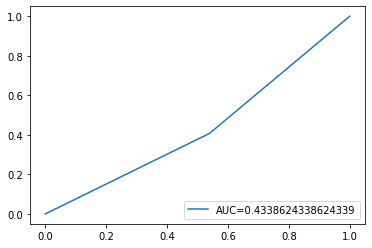

In [55]:
X = df[['AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'season']]
y = df['RAIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#GLM LOGISTIC
GLMFIT1= sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(GLMFIT1.summary())

# Predict responses 
pred_1 = GLMFIT1.predict(X_test)
prediction_1 = list(map(round, pred_1))

regression_results(y_test, prediction_1)

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

cm = confusion_matrix(y_test, prediction_1) 

print ("\nConfusion Matrix : \n", cm) 
## 
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_1)
auc = metrics.roc_auc_score(y_test, prediction_1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [201]:
out= pd.DataFrame({'ytest': y_test, 'yPred': prediction_1})

In [204]:
out.to_excel (r'export_dataframe.xlsx', index = False, header=True)

FileCreateError: [Errno 13] Permission denied: 'export_dataframe.xlsx'

In [20]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [28]:
regression_results(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

explained_variance:  0.0727
mean_squared_log_error:  0.1335
r2:  -0.2123
MAE:  0.2778
MSE:  0.2778
RMSE:  0.527
Accuracy: 0.7222222222222222


In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[57,  1],
       [24,  8]], dtype=int64)

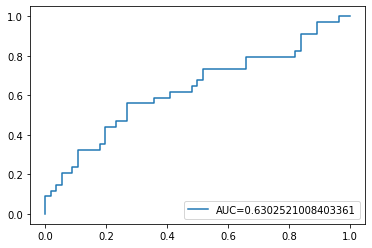

In [67]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()